Emily Q. Wang | PHS | Fall 2016

# Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
from IPython.display import display
import seaborn as sns
from datetime import timedelta
import scipy
from scipy.signal import argrelextrema
import pprint as pp

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [16]:
COLORS = ['#e0ecf4', # light gray-blue 
          '#9ebcda', # darker gray-blue
          '#8856a7', # purple
          '#edf8fb', # very light gray-blue
          '#810f7c'] # magenta-purple

BGCOLOR = COLORS[0]

LINEALPHA = 1.0
LINECOLOR = COLORS[2]
LINEWIDTH = 0.5
LINESTYLE = '-'

STEPCOUNTLINECOLOR = COLORS[1]

ACTIVITYPOINTSIZE = 100
ACTIVITYALPHA = 0.025
ACTIVITYCOLORS = [COLORS[0], # silent
                  COLORS[2], # walking
                  COLORS[4], # running
                  'black',   # non-wear
                  COLORS[1], # rem
                  COLORS[3], # non-rem
                  'yellow',  # charging 
                  'black']    # unknown
ACTIVITYLABELS = {0: "Silent", 
                  1: "Walking", 
                  2: "Running", 
                  3: "Non-wear", 
                  4: "REM", 
                  5: "NREM", 
                  6: "Charging", 
                  7: "Unknown"}
ACTIVITYMARKEREDGECOLOR = 'black'
ACTIVITYMARKEREDGEWIDTH = 0.5

VLINEALPHA = 0.85
VLINECOLOR = 'k'
VLINEWIDTH = 0.5
VLINESTYLE = '--'

LOCALMAXCOLOR = sns.color_palette()[0]
LOCALMAXMARKERSIZE = 5

POINCAREALPHA = 0.25
POINCARECOLOR = '#31a354'
POINCAREMARKER = 'o'
POINCAREMARKEREDGECOLOR = 'black'
POINCAREMARKEREDGEWIDTH = 0.5

YEQUALSXALPHA = 0.5
YEQUALSXCOLOR = 'k'
YEQUALSXLINESTYLE = '--'

In [4]:
def place_text(x, y, text, axes, specific_fontsize=11, specific_color='k'):
    axes.text(x, y, text,
              verticalalignment='bottom', horizontalalignment='left',
              transform=axes.transAxes,
              color=specific_color, fontsize=specific_fontsize)
    return

In [5]:
data = pd.read_csv('day1_v3transpose.csv')
display(data.head())

,RRi,RRii,RRi_interp,RRii_interp,freqs,periodogram,low_power,high_power,activitytype_daytime,activitytype,activitytype_interp,activitytype_daytime_interp,steps_daytime,steps,steps_interp,steps_daytime_interp,hr_daytime,hr,hr_interp,hr_daytime_interp,rMSSD,pNN50,Median,gt180,act_silent_percentage,act_walking_percentage,act_running_percentage,act_nonWear_percentage,act_REM_percentage,act_NREM_percentage,act_charging_percentage,act_undefined_percentage,act_silent_percentage_allday,act_walking_percentage_allday,act_running_percentage_allday,act_nonWear_percentage_allday,act_REM_percentage_allday,act_NREM_percentage_allday,act_charging_percentage_allday,act_undefined_percentage_allday
0,79.000000,77.083333,79.0,79.0,0.010000,4441.012781,2397.535137,2855.794416,16.011389,0.0,0.0,16.011389,16.011389,0.0,0.0,16.011389,24.838719,79.000000,79.0,16.011389,640.171653,0.573090,73.0,0.0,77.083333,20.416667,0.0,0.000000,0.000000,0.000000,0.0,2.500000,56.780227,12.090848,0.0,3.807615,2.939212,22.110888,0.0,2.271209
1,77.083333,74.636364,79.0,79.0,0.010049,4448.639839,NaN,NaN,16.028056,0.0,0.0,16.028056,16.028056,0.0,0.0,16.028056,24.839685,77.083333,79.0,16.028056,492.368234,0.455786,77.0,0.0,75.833333,19.444444,0.0,0.000000,0.000000,0.000000,0.0,4.722222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74.636364,76.400000,79.0,79.0,0.010098,4456.312152,NaN,NaN,16.044722,0.0,0.0,16.044722,16.044722,0.0,0.0,16.044722,24.839695,74.636364,79.0,16.044722,495.503666,0.486188,74.0,0.0,31.506849,1.978691,0.0,8.675799,6.697108,50.380517,0.0,0.761035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,76.400000,78.111111,79.0,79.0,0.010147,4464.029833,NaN,NaN,16.061389,0.0,0.0,16.061389,16.061389,0.0,0.0,16.061389,24.839702,76.400000,79.0,16.061389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78.111111,80.666667,79.0,79.0,0.010196,4471.792992,NaN,NaN,16.078056,0.0,0.0,16.078056,16.078056,0.0,0.0,16.078056,24.839842,78.111111,79.0,16.078056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Time Series Heart Rate Signal

Ada's stylistic feedback (strikethrough means it's done):
- ~~Keep the grid~~
- ~~Lines instead of dots~~
- ~~Background color: lightest blue COLORS[0]~~
- ~~Signal color: purple COLORS[2]~~
- ~~Check time values on x axis (why does hr_daytime start at 24?)~~
- ~~Some indication of step count as an overlay visualization (`steps_interp` and `steps_time_interp`)~~
- ~~Some indication of activity type as an overlay visualization (`type_interp` and `type_time_interp`)~~
- ~~rMSSD and Median text~~
- ~~Color coding by activity type~~
- ~~Color coding legend~~
- ~~Morning, Afternoon, Night text values~~
- ~~Put text in the graph area~~
- box around text

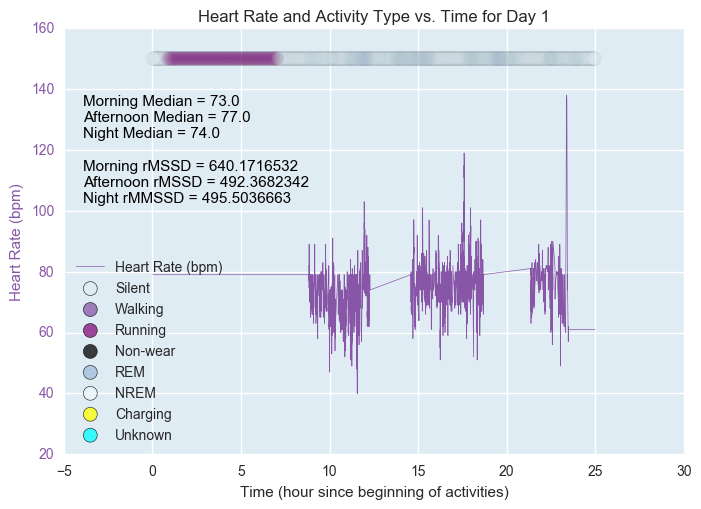

In [6]:
# heart rate
fig, ax1 = plt.subplots()
ax1.plot(data['hr_daytime_interp'].subtract(16), 
         # the subtract(16) is because the data begins at hour 16 rather than hour 0
         data['hr_interp'], 
         linestyle=LINESTYLE, alpha=LINEALPHA, color=LINECOLOR, linewidth=LINEWIDTH, label='Heart Rate (bpm)')
ax1.set_ylabel('Heart Rate (bpm)')
ax1.yaxis.label.set_color(LINECOLOR)
for ytick in ax1.get_yticklabels():
    ytick.set_color(LINECOLOR)

# # step count
# ax2 = ax1.twinx()
# ax2.plot(data['steps_daytime_interp'].subtract(16),
#          data['steps_interp'], 
#          linestyle=LINESTYLE, alpha=LINEALPHA, color=STEPCOUNTLINECOLOR, linewidth=LINEWIDTH)
# ax2.set_ylabel('Step Count')
# ax2.yaxis.label.set_color(STEPCOUNTLINECOLOR)
# for ytick in ax2.get_yticklabels():
#     ytick.set_color(STEPCOUNTLINECOLOR)

# activity type
ax1.scatter(data['activitytype_daytime'].subtract(16),
            np.ones(len(data['activitytype'])) * 150,
            c=data['activitytype'],
            cmap=matplotlib.colors.ListedColormap(COLORS), 
            s=ACTIVITYPOINTSIZE, alpha=ACTIVITYALPHA)

ax1.scatter([], [], s=ACTIVITYPOINTSIZE, alpha=0.75, color=ACTIVITYCOLORS[0], label=ACTIVITYLABELS[0], edgecolors=ACTIVITYMARKEREDGECOLOR, linewidths=ACTIVITYMARKEREDGEWIDTH) 
ax1.scatter([], [], s=ACTIVITYPOINTSIZE, alpha=0.75, color=ACTIVITYCOLORS[1], label=ACTIVITYLABELS[1], edgecolors=ACTIVITYMARKEREDGECOLOR, linewidths=ACTIVITYMARKEREDGEWIDTH)
ax1.scatter([], [], s=ACTIVITYPOINTSIZE, alpha=0.75, color=ACTIVITYCOLORS[2], label=ACTIVITYLABELS[2], edgecolors=ACTIVITYMARKEREDGECOLOR, linewidths=ACTIVITYMARKEREDGEWIDTH)
ax1.scatter([], [], s=ACTIVITYPOINTSIZE, alpha=0.75, color=ACTIVITYCOLORS[3], label=ACTIVITYLABELS[3], edgecolors=ACTIVITYMARKEREDGECOLOR, linewidths=ACTIVITYMARKEREDGEWIDTH)
ax1.scatter([], [], s=ACTIVITYPOINTSIZE, alpha=0.75, color=ACTIVITYCOLORS[4], label=ACTIVITYLABELS[4], edgecolors=ACTIVITYMARKEREDGECOLOR, linewidths=ACTIVITYMARKEREDGEWIDTH)
ax1.scatter([], [], s=ACTIVITYPOINTSIZE, alpha=0.75, color=ACTIVITYCOLORS[5], label=ACTIVITYLABELS[5], edgecolors=ACTIVITYMARKEREDGECOLOR, linewidths=ACTIVITYMARKEREDGEWIDTH)
ax1.scatter([], [], s=ACTIVITYPOINTSIZE, alpha=0.75, color=ACTIVITYCOLORS[6], label=ACTIVITYLABELS[6], edgecolors=ACTIVITYMARKEREDGECOLOR, linewidths=ACTIVITYMARKEREDGEWIDTH)
ax1.scatter([], [], s=ACTIVITYPOINTSIZE, alpha=0.75, color=ACTIVITYCOLORS[7], label=ACTIVITYLABELS[7], edgecolors=ACTIVITYMARKEREDGECOLOR, linewidths=ACTIVITYMARKEREDGEWIDTH)
ax1.legend(loc=3)

# additional calculations/summary statistics
morning_median_str = str(data['Median'][0])
afternoon_median_str = str(data['Median'][1])
night_median_str = str(data['Median'][2])

morning_rMSSD_str = str(data['rMSSD'][0])
afternoon_rMSSD_str = str(data['rMSSD'][1])
night_rMSSD_str = str(data['rMSSD'][2])

axes = plt.gca()
axes.set_axis_bgcolor(BGCOLOR)
place_text(0.03, 0.585, 'Morning Median = ' + morning_median_str + 
                      '\nAfternoon Median = ' + afternoon_median_str +
                      '\nNight Median = ' + night_median_str +
                      '\n\nMorning rMSSD = ' + morning_rMSSD_str + 
                      '\nAfternoon rMSSD = ' + afternoon_rMSSD_str +
                      '\nNight rMMSSD = ' + night_rMSSD_str,
                     axes)

ax1.set_xlabel('Time (hour since beginning of activities)') 
plt.title('Heart Rate and Activity Type vs. Time for Day 1')

plt.savefig('day1_TimeSeriesHeartRateActivityType.png', format='png')
plt.savefig('day1_TimeSeriesHeartRateActivityType.pdf', format='pdf')
plt.show()

## Frequency Domain Signal

Ada's stylistic concerns:
- ~~Keep the grid~~
- ~~Lines instead of dots~~
- ~~Background color: lightest blue COLORS[0]~~
- ~~Signal color: purple COLORS[2]~~
- ~~Iterating on: VLF, LF, HF vertical line boundaries and corresponding frequency values at the boundary~~
- ~~Label peak coordinates~~
- ~~background shading for VLF, LF regions~~

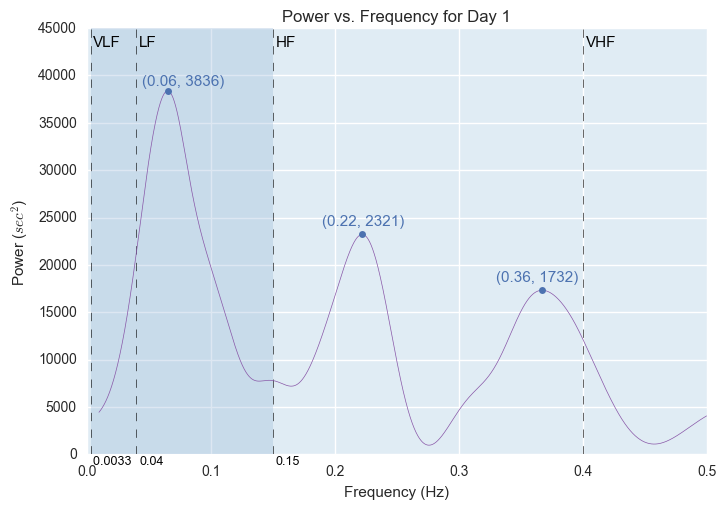

In [7]:
plt.axvline(x=0.0033, 
            linestyle=VLINESTYLE, alpha=VLINEALPHA, color=VLINECOLOR, linewidth=VLINEWIDTH)
plt.axvline(x=0.04, 
            linestyle=VLINESTYLE, alpha=VLINEALPHA, color=VLINECOLOR, linewidth=VLINEWIDTH)
plt.axvline(x=0.15, 
            linestyle=VLINESTYLE, alpha=VLINEALPHA, color=VLINECOLOR, linewidth=VLINEWIDTH)
plt.axvline(x=0.4, 
            linestyle=VLINESTYLE, alpha=VLINEALPHA, color=VLINECOLOR, linewidth=VLINEWIDTH)
plt.axvline(x=0.5, 
            linestyle=VLINESTYLE, alpha=VLINEALPHA, color=VLINECOLOR, linewidth=VLINEWIDTH)

plt.plot(data['freqs'], 
         data['periodogram'], 
         linestyle=LINESTYLE, alpha=LINEALPHA, color=LINECOLOR, linewidth=LINEWIDTH)

lf = data['low_power'][0]
hf = data['high_power'][0]

axes = plt.gca()
axes.set_axis_bgcolor(BGCOLOR)
axes.set_ylim([0, 45000])

# labelling power regions
place_text(0.01, 0.95, 'VLF', axes)
place_text(0.01, -0.03, '0.0033 ', axes, specific_fontsize=9)
# plt.axvspan(0.0033, 0.04, color='#9ebcda', alpha=0.35, linewidth=0) # zebra striping
plt.axvspan(0.0033, 0.15, color='#9ebcda', alpha=0.35, linewidth=0) # background shading for  VLF and LF
place_text(0.085, 0.95, 'LF', axes)
place_text(0.085, -0.03, '0.04', axes, specific_fontsize=9)
place_text(0.305, 0.95, 'HF', axes)
place_text(0.305, -0.03, '0.15', axes, specific_fontsize=9)
# plt.axvspan(0.15, 0.4, color='#9ebcda', alpha=0.35, linewidth=0) # zebra striping
place_text(0.805, 0.95, 'VHF', axes)

# labelling the peaks
local_max_indices = argrelextrema(np.array(data['periodogram']), np.greater)
plt.plot(data['freqs'][local_max_indices[0][0]], 
         data['periodogram'][local_max_indices[0][0]], 
         'o', color=LOCALMAXCOLOR, markersize=LOCALMAXMARKERSIZE)
text = '(' + str(data['freqs'][local_max_indices[0][0]])[0:4] + ', ' + str(data['periodogram'][local_max_indices[0][0]])[0:4] + ')'
place_text(0.09, 0.86, text, axes, specific_color=LOCALMAXCOLOR)

plt.plot(data['freqs'][local_max_indices[0][2]], 
         data['periodogram'][local_max_indices[0][2]], 
         'o', color=LOCALMAXCOLOR, markersize=LOCALMAXMARKERSIZE)
text = '(' + str(data['freqs'][local_max_indices[0][2]])[0:4] + ', ' + str(data['periodogram'][local_max_indices[0][2]])[0:4] + ')'
place_text(0.38, 0.53, text, axes, specific_color=LOCALMAXCOLOR)

plt.plot(data['freqs'][local_max_indices[0][3]], 
         data['periodogram'][local_max_indices[0][3]], 
         'o', color=LOCALMAXCOLOR, markersize=LOCALMAXMARKERSIZE)
text = '(' + str(data['freqs'][local_max_indices[0][3]])[0:4] + ', ' + str(data['periodogram'][local_max_indices[0][3]])[0:4] + ')'
place_text(0.66, 0.4, text, axes, specific_color=LOCALMAXCOLOR)
                 
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power ($sec^2$)")
plt.title("Power vs. Frequency for Day 1")

plt.savefig('day1_FrequencyDomainSignal.png', format='png')
plt.savefig('day1_FrequencyDomainSignal.pdf', format='pdf')
plt.show()

## Poincare Plot

Ada's stylistic concerns:
- ~~Keep the grid~~ 
- ~~Background color: lightest blue COLORS[0]~~
- ~~Signal color: purple COLORS[2]~~
- ~~Dotted x=y line~~
- ~~Color coding types of beats - not happening; there was no analysis done to categorize the beats~~
- ~~pNN50 and entropy numbers in a text box, if available~~
- ~~linewidth 0.5 for x=y line~~
- ~~label morning, afternoon, and night pNN50 values~~
- ~~change marker colors to be different from the colors used in the time series visualizations~~
- ~~outline of marker~~

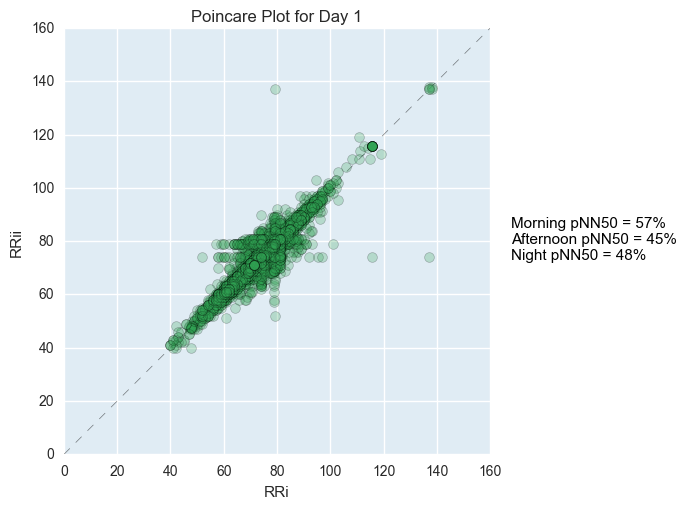

In [8]:
plt.plot(np.arange(0, 160, 0.05), 
         np.arange(0, 160, 0.05), 
         linestyle=YEQUALSXLINESTYLE, color=YEQUALSXCOLOR, alpha=YEQUALSXALPHA, linewidth=LINEWIDTH) 

plt.plot(data['RRi'], 
         data['RRii'], 
         'o', alpha=POINCAREALPHA, color=POINCARECOLOR, 
         markeredgecolor=POINCAREMARKEREDGECOLOR, markeredgewidth=POINCAREMARKEREDGEWIDTH)

axes = plt.gca()
axes.set_xlim([0, 160])
axes.set_ylim([0, 160])
axes.set_aspect('equal', adjustable='box')
axes.set_axis_bgcolor(BGCOLOR)

morning_pNN50_str = str(data['pNN50'][0])[2:4]
afternoon_pNN50_str = str(data['pNN50'][1])[2:4]
night_pNN50_str = str(data['pNN50'][2])[2:4]
place_text(1.05, 0.45, 'Morning pNN50 = ' + morning_pNN50_str + '%' +
                       '\nAfternoon pNN50 = ' + afternoon_pNN50_str + '%' +
                       '\nNight pNN50 = ' + night_pNN50_str + '%', 
                       axes)

plt.xlabel('RRi')
plt.ylabel('RRii')
plt.title('Poincare Plot for Day 1')

plt.savefig('day1_PoincarePlot_SingleColor.png', format='png', bbox_inches='tight')
plt.savefig('day1_PoincarePlot_SingleColor.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [9]:
print data['activitytype'].unique()
data['activitytype'] = data['activitytype'].fillna(7.0)
print data['activitytype'].unique()
display(data)

[  0.   4.   5.   1.   3.  nan]
[ 0.  4.  5.  1.  3.  7.]


,RRi,RRii,RRi_interp,RRii_interp,freqs,periodogram,low_power,high_power,activitytype_daytime,activitytype,activitytype_interp,activitytype_daytime_interp,steps_daytime,steps,steps_interp,steps_daytime_interp,hr_daytime,hr,hr_interp,hr_daytime_interp,rMSSD,pNN50,Median,gt180,act_silent_percentage,act_walking_percentage,act_running_percentage,act_nonWear_percentage,act_REM_percentage,act_NREM_percentage,act_charging_percentage,act_undefined_percentage,act_silent_percentage_allday,act_walking_percentage_allday,act_running_percentage_allday,act_nonWear_percentage_allday,act_REM_percentage_allday,act_NREM_percentage_allday,act_charging_percentage_allday,act_undefined_percentage_allday
0,79.000000,77.083333,79.0,79.0,0.010000,4441.012781,2397.535137,2855.794416,16.011389,0.0,0.0,16.011389,16.011389,0.0,0.0,16.011389,24.838719,79.000000,79.0,16.011389,640.171653,0.573090,73.0,0.0,77.083333,20.416667,0.0,0.000000,0.000000,0.000000,0.0,2.500000,56.780227,12.090848,0.0,3.807615,2.939212,22.110888,0.0,2.271209
1,77.083333,74.636364,79.0,79.0,0.010049,4448.639839,NaN,NaN,16.028056,0.0,0.0,16.028056,16.028056,0.0,0.0,16.028056,24.839685,77.083333,79.0,16.028056,492.368234,0.455786,77.0,0.0,75.833333,19.444444,0.0,0.000000,0.000000,0.000000,0.0,4.722222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74.636364,76.400000,79.0,79.0,0.010098,4456.312152,NaN,NaN,16.044722,0.0,0.0,16.044722,16.044722,0.0,0.0,16.044722,24.839695,74.636364,79.0,16.044722,495.503666,0.486188,74.0,0.0,31.506849,1.978691,0.0,8.675799,6.697108,50.380517,0.0,0.761035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,76.400000,78.111111,79.0,79.0,0.010147,4464.029833,NaN,NaN,16.061389,0.0,0.0,16.061389,16.061389,0.0,0.0,16.061389,24.839702,76.400000,79.0,16.061389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78.111111,80.666667,79.0,79.0,0.010196,4471.792992,NaN,NaN,16.078056,0.0,0.0,16.078056,16.078056,0.0,0.0,16.078056,24.839842,78.111111,79.0,16.078056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,80.666667,82.777778,79.0,79.0,0.010245,4479.601740,NaN,NaN,16.094722,0.0,0.0,16.094722,16.094722,0.0,0.0,16.094722,24.840126,80.666667,79.0,16.094722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,82.777778,84.111111,79.0,79.0,0.010294,4487.456191,NaN,NaN,16.111389,0.0,0.0,16.111389,16.111389,0.0,0.0,16.111389,24.840424,82.777778,79.0,16.111389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,84.111111,84.000000,79.0,79.0,0.010343,4495.356456,NaN,NaN,16.128056,0.0,0.0,16.128056,16.128056,0.0,0.0,16.128056,24.840708,84.111111,79.0,16.128056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,84.000000,87.000000,79.0,79.0,0.010392,4503.302648,NaN,NaN,16.144722,0.0,0.0,16.144722,16.144722,0.0,0.0,16.144722,24.840966,84.000000,79.0,16.144722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,87.000000,88.000000,79.0,79.0,0.010441,4511.294881,NaN,NaN,16.161389,0.0,0.0,16.161389,16.161389,0.0,0.0,16.161389,24.841250,87.000000,79.0,16.161389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


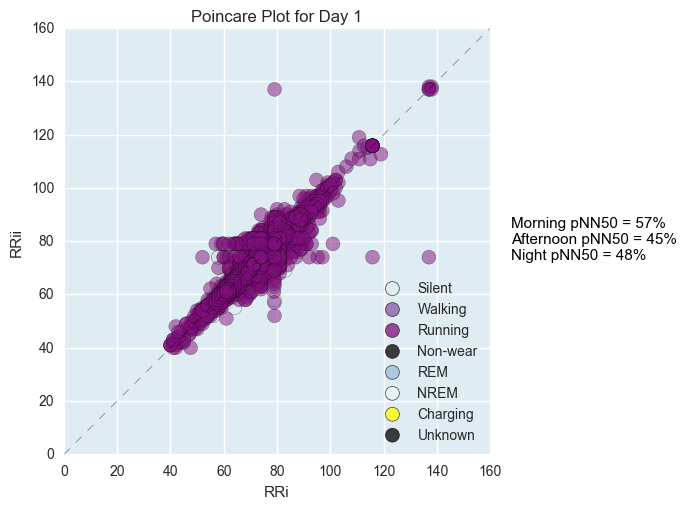

In [17]:
plt.scatter([], [], s=ACTIVITYPOINTSIZE, alpha=0.75, color=ACTIVITYCOLORS[0], label=ACTIVITYLABELS[0], edgecolors=ACTIVITYMARKEREDGECOLOR, linewidths=ACTIVITYMARKEREDGEWIDTH) 
plt.scatter([], [], s=ACTIVITYPOINTSIZE, alpha=0.75, color=ACTIVITYCOLORS[1], label=ACTIVITYLABELS[1], edgecolors=ACTIVITYMARKEREDGECOLOR, linewidths=ACTIVITYMARKEREDGEWIDTH)
plt.scatter([], [], s=ACTIVITYPOINTSIZE, alpha=0.75, color=ACTIVITYCOLORS[2], label=ACTIVITYLABELS[2], edgecolors=ACTIVITYMARKEREDGECOLOR, linewidths=ACTIVITYMARKEREDGEWIDTH)
plt.scatter([], [], s=ACTIVITYPOINTSIZE, alpha=0.75, color=ACTIVITYCOLORS[3], label=ACTIVITYLABELS[3], edgecolors=ACTIVITYMARKEREDGECOLOR, linewidths=ACTIVITYMARKEREDGEWIDTH)
plt.scatter([], [], s=ACTIVITYPOINTSIZE, alpha=0.75, color=ACTIVITYCOLORS[4], label=ACTIVITYLABELS[4], edgecolors=ACTIVITYMARKEREDGECOLOR, linewidths=ACTIVITYMARKEREDGEWIDTH)
plt.scatter([], [], s=ACTIVITYPOINTSIZE, alpha=0.75, color=ACTIVITYCOLORS[5], label=ACTIVITYLABELS[5], edgecolors=ACTIVITYMARKEREDGECOLOR, linewidths=ACTIVITYMARKEREDGEWIDTH)
plt.scatter([], [], s=ACTIVITYPOINTSIZE, alpha=0.75, color=ACTIVITYCOLORS[6], label=ACTIVITYLABELS[6], edgecolors=ACTIVITYMARKEREDGECOLOR, linewidths=ACTIVITYMARKEREDGEWIDTH)
plt.scatter([], [], s=ACTIVITYPOINTSIZE, alpha=0.75, color=ACTIVITYCOLORS[7], label=ACTIVITYLABELS[7], edgecolors=ACTIVITYMARKEREDGECOLOR, linewidths=ACTIVITYMARKEREDGEWIDTH)
plt.legend(loc=4)

plt.plot(np.arange(0, 160, 0.05), 
         np.arange(0, 160, 0.05), 
         linestyle=YEQUALSXLINESTYLE, color=YEQUALSXCOLOR, alpha=YEQUALSXALPHA, linewidth=LINEWIDTH) 

plt.scatter(data['RRi'],
            data['RRii'],
            c=data['activitytype'],
            cmap=matplotlib.colors.ListedColormap(COLORS), 
            s=ACTIVITYPOINTSIZE, alpha=0.5)

axes = plt.gca()
axes.set_xlim([0, 160])
axes.set_ylim([0, 160])
axes.set_aspect('equal', adjustable='box')
axes.set_axis_bgcolor(BGCOLOR)

morning_pNN50_str = str(data['pNN50'][0])[2:4]
afternoon_pNN50_str = str(data['pNN50'][1])[2:4]
night_pNN50_str = str(data['pNN50'][2])[2:4]
place_text(1.05, 0.45, 'Morning pNN50 = ' + morning_pNN50_str + '%' +
                       '\nAfternoon pNN50 = ' + afternoon_pNN50_str + '%' +
                       '\nNight pNN50 = ' + night_pNN50_str + '%', 
                       axes)

plt.xlabel('RRi')
plt.ylabel('RRii')
plt.title('Poincare Plot for Day 1')

plt.savefig('day1_PoincarePlot_ActivityColors.png', format='png', bbox_inches='tight')
plt.savefig('day1_PoincarePlot_ActivityColors.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Detrended Fluctuation Analysis

- ~~Plot time series integral~~
- ~~Parameters for DFA fast and DFA slow~~
- ~~Best fit lines for each interval~~
- ~~Update colors~~

### DFA Step0: "The data!"

In [11]:
data['time_min'] = data['hr_daytime_interp'].sub(16).multiply(60)

In [12]:
display(data['hr_interp'][0:8800].unique())

array([ 79.        ,  77.08333333,  74.63636364, ...,  72.94669719,
        65.24366091,  57.54062463])

### DFA Step1: "Briefly, the time series to be analyzed (with _N_ samples) is first integrated, $y(k) = \sum_{i=1}^{k} [B(i) - B_{average}]$"

In [13]:
B_avg = data['hr_interp'].mean()
data['dfa_BiMinusBavg'] = data.loc[:, 'hr_interp'].sub(B_avg)
data['dfa_yk'] = data['dfa_BiMinusBavg'].cumsum()
display(data.head())

,RRi,RRii,RRi_interp,RRii_interp,freqs,periodogram,low_power,high_power,activitytype_daytime,activitytype,activitytype_interp,activitytype_daytime_interp,steps_daytime,steps,steps_interp,steps_daytime_interp,hr_daytime,hr,hr_interp,hr_daytime_interp,rMSSD,pNN50,Median,gt180,act_silent_percentage,act_walking_percentage,act_running_percentage,act_nonWear_percentage,act_REM_percentage,act_NREM_percentage,act_charging_percentage,act_undefined_percentage,act_silent_percentage_allday,act_walking_percentage_allday,act_running_percentage_allday,act_nonWear_percentage_allday,act_REM_percentage_allday,act_NREM_percentage_allday,act_charging_percentage_allday,act_undefined_percentage_allday,time_min,dfa_BiMinusBavg,dfa_yk
0,79.000000,77.083333,79.0,79.0,0.010000,4441.012781,2397.535137,2855.794416,16.011389,0.0,0.0,16.011389,16.011389,0.0,0.0,16.011389,24.838719,79.000000,79.0,16.011389,640.171653,0.573090,73.0,0.0,77.083333,20.416667,0.0,0.000000,0.000000,0.000000,0.0,2.500000,56.780227,12.090848,0.0,3.807615,2.939212,22.110888,0.0,2.271209,0.683333,4.468189,4.468189
1,77.083333,74.636364,79.0,79.0,0.010049,4448.639839,NaN,NaN,16.028056,0.0,0.0,16.028056,16.028056,0.0,0.0,16.028056,24.839685,77.083333,79.0,16.028056,492.368234,0.455786,77.0,0.0,75.833333,19.444444,0.0,0.000000,0.000000,0.000000,0.0,4.722222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.683334,4.468189,8.936377
2,74.636364,76.400000,79.0,79.0,0.010098,4456.312152,NaN,NaN,16.044722,0.0,0.0,16.044722,16.044722,0.0,0.0,16.044722,24.839695,74.636364,79.0,16.044722,495.503666,0.486188,74.0,0.0,31.506849,1.978691,0.0,8.675799,6.697108,50.380517,0.0,0.761035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.683333,4.468189,13.404566
3,76.400000,78.111111,79.0,79.0,0.010147,4464.029833,NaN,NaN,16.061389,0.0,0.0,16.061389,16.061389,0.0,0.0,16.061389,24.839702,76.400000,79.0,16.061389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.683333,4.468189,17.872755
4,78.111111,80.666667,79.0,79.0,0.010196,4471.792992,NaN,NaN,16.078056,0.0,0.0,16.078056,16.078056,0.0,0.0,16.078056,24.839842,78.111111,79.0,16.078056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.683334,4.468189,22.340943


### DFA Step2: "Divide the integrated time series into boxes of equal length..."

* DFA fast (0.5 minutes and 1 minute)
* DFA slow (3 minutes and 5 minutes)

### DFA Step3: "In each box, a least squares line is fit to the data (representing the trend in that box). The $y$ coordinate of the straight line segments is denoted by $y_n(k)$."

In [14]:
def resadjust(ax, xres=None, yres=None):
    """
    Send in an axis and I fix the resolution as desired.
    helper function from Tompa's response to this stackoverflow question:
    http://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib
    """

    if xres:
        start, stop = ax.get_xlim()
        ticks = np.arange(start, stop + xres, xres)
        ax.set_xticks(ticks)
    if yres:
        start, stop = ax.get_ylim()
        ticks = np.arange(start, stop + yres, yres)
        ax.set_yticks(ticks)

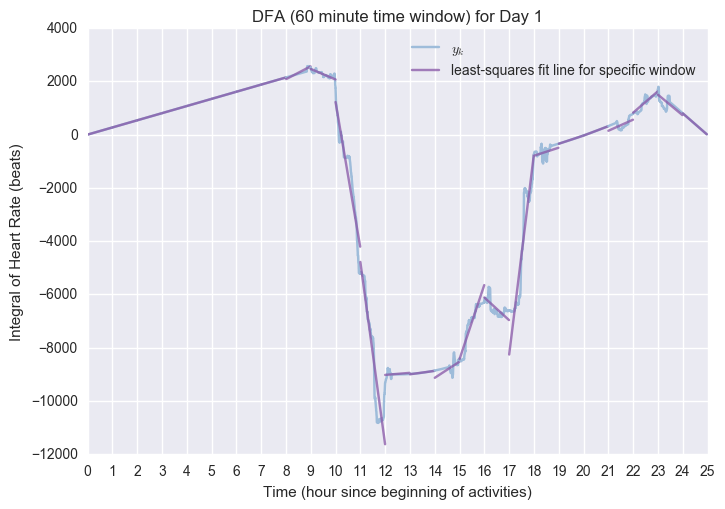

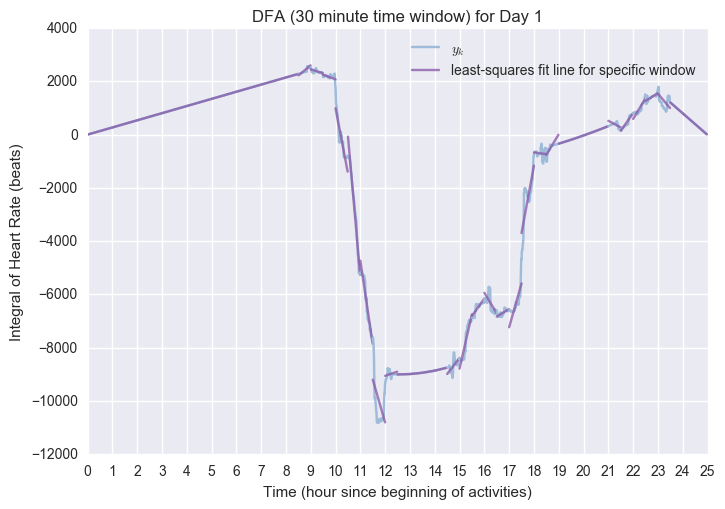

In [15]:
def dfa_linregress(window):
    # window value is in minutes
    box_start = 0.0
    box_end = box_start + window
    ynk = pd.Series([])

    while box_end <= data['time_min'].max():
        # box setup
        dfa_box = data.copy()
        dfa_box = dfa_box[(dfa_box['time_min'] >= box_start) & (dfa_box['time_min'] < box_end)]

        # ugh no time for more elaborate debugging
        if dfa_box['time_min'].size == 0 or dfa_box['dfa_yk'].size==0:
            break

        # least-squares fit line and plotting
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(dfa_box['time_min'], 
                                                                             dfa_box['dfa_yk'])
        plt.plot(dfa_box['time_min'].div(60), 
                 dfa_box['dfa_yk'],
                 '-', color=COLORS[1])
        plt.plot(dfa_box['time_min'].div(60), 
                 dfa_box['time_min'].multiply(slope) + intercept, 
                 '-', color=COLORS[2],
                 alpha = 0.75)

        ynk = ynk.append(dfa_box['time_min'].multiply(slope) + intercept)

        # prepare box_start and box_end for next iteration
        box_start += window 
        box_end += window
        if box_end > data['time_min'].max():
            box_end = data['time_min'].max()

    axes = plt.gca()
    resadjust(axes, xres=1)
    plt.title("DFA (" + str(window) + " minute time window) for Day 1")
    plt.legend(["$y_k$", "least-squares fit line for specific window"])
    plt.xlabel('Time (hour since beginning of activities)')
    plt.ylabel('Integral of Heart Rate (beats)')

    filename_dict = {30.0: "30min",
                     60.0: "60min"}
    plt.savefig("dfa_"+filename_dict[window]+".png", format='png')
    plt.savefig("dfa_"+filename_dict[window]+".pdf", format='pdf')
    plt.show()

    return ynk

ynk_hour = dfa_linregress(60)
ynk_halfhour = dfa_linregress(30)